## CNN_CASAS_E_PREDIOS_MAPS_DATASET-Modelo_Aprendendo

Dataset com imagens de Casas e predios.  Sendo 41 imagnes de trainamento contendo duas 2 classes.
20 imagnes validação e 8 imagens de teste. Extraidas do Google Maps.

The 2 classes are:

<ol start="0">
<li> casa
<li>  predio
</ol>

---

### Preparação de imagem para Classificador de Imagens da CNN com Keras

Na primeira parte, percorremos as diferentes camadas e como elas são configuradas.

In [148]:
from __future__ import print_function
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import Input
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import*
from sklearn.metrics import confusion_matrix
import itertools

In [149]:
train_path = 'data2/train'
valid_path = 'data2/valid'
test_path = 'data2/test'

In [150]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['predio','casa'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['predio','casa'], batch_size=3)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['predio','casa'], batch_size=5)

Found 41 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [151]:
#plots imagens rótulos dentro do notebook jupyter

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None, maintitle=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3): 
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [152]:
imgs, labels = next(train_batches)

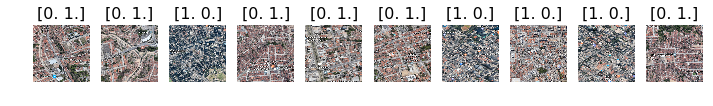

In [153]:
plots(imgs, titles=labels)

In [154]:
###Criando e treinando um Classificador de Imagens da CNN com Keras


In [155]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(224,224, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), input_shape=(224,224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=(112, 112, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), input_shape=(112, 112, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, (3, 3), input_shape=(62, 62, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), input_shape=(62, 62, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), input_shape=(31, 31, 3), activation='relu'))
model.add(Conv2D(8, (3, 3), input_shape=(31, 31, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(50, activation ='relu'))

model.add(Dense(2, activation ='softmax'))

model.summary()         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 218, 218, 32)      9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 107, 107, 32)      9248      
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 105, 105, 32)      9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 50, 50, 16)        4624      
__________

In [162]:
optimizer = Adam(lr=0.0001)

In [163]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [164]:
model.fit_generator(train_batches, steps_per_epoch=10,
                    validation_data=valid_batches, validation_steps=3, epochs=5, verbose=1)

Epoch 1/5
10/10 [==============================] - 27s 3s/step - loss: 0.7989 - acc: 0.6430 - val_loss: 0.4622 - val_acc: 0.7778
Epoch 2/5
10/10 [==============================] - 23s 2s/step - loss: 0.4573 - acc: 0.7960 - val_loss: 0.3728 - val_acc: 0.8889
Epoch 3/5
10/10 [==============================] - 25s 2s/step - loss: 0.2830 - acc: 0.9082 - val_loss: 0.3067 - val_acc: 0.8889
Epoch 4/5
10/10 [==============================] - 26s 3s/step - loss: 0.2707 - acc: 0.8878 - val_loss: 0.2878 - val_acc: 0.8889
Epoch 5/5
10/10 [==============================] - 27s 3s/step - loss: 0.2592 - acc: 0.9388 - val_loss: 0.3221 - val_acc: 0.8889


In [165]:
# Preditor - Classificador de Imagens CNN da Keras  (Casas e Predios) extraidas do Google Maps

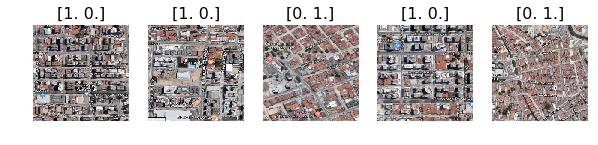

In [166]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [167]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 1., 0.], dtype=float32)

In [168]:
predictions = model.predict_generator(test_batches, steps=1, verbose=1)

1/1 [==============================] - 1s 1s/step


In [169]:
predictions

array([[0.98940325, 0.01059671],
       [0.44737276, 0.55262727],
       [0.5611529 , 0.43884712],
       [0.9256737 , 0.07432631],
       [0.5879383 , 0.4120617 ]], dtype=float32)

In [170]:
# Matrix de confusão do Classificador

In [171]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [172]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 2]
 [1 2]]


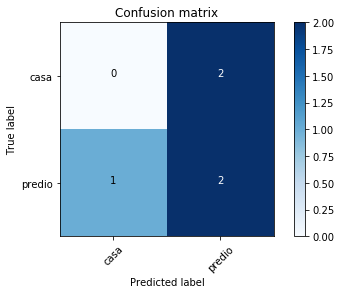

In [173]:
cm_plot_labels = ['casa','predio']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')